In [94]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
import os
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.interpolate import interp1d
from scipy.stats import linregress
import matplotlib.pyplot as plt 

# MYPATH="/Users/weugene/Dropbox/Aslan-Evgenii/media/pictures/Heat-transfer/"
MYPATH="../Heat_transfer_Polymerization/Verif/"

wl=2
MYSTYLE=[dict(color='royalblue', width=wl), dict(color='red', width=wl, dash='dot'),
         dict(color='aqua', width=wl, dash='dash'), dict(color='violet', width=wl, dash='dash'),
         dict(color='lightskyblue', width=wl, dash='dot'), dict(color='orange', width=wl, dash='dot'),
         dict(color='black', width=wl, dash='dash'), dict(color='darkmagenta', width=wl, dash='dash')]
def plot_graph(list_x, list_y, names, xtitle, ytitle, image_name, list_x_fill=[], list_y_fill=[], mode=[], \
			   dash=['solid', 'dot', 'dash', 'longdash'], \
			   colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
			   marker_size=15, xrange =[], yrange = [], \
			   marker_style = ['circle', 'triangle-up', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
			   width=1000, height=500, path='./', yanchor='center', y0_anchor=0.01, xanchor='left', x0_anchor=0.3, xlog=False, ylog=False):
	if mode == []:
		for i in range(len(list_x)):
			mode.append('lines+markers')


	while len(marker_style) < len(list_x):
		marker_style[:] = marker_style[:] + marker_style[:]
	figborderlinesize = 0.7
	legborderlinesize = 0.7
	yaxis = dict(
		tickfont = dict(
			family = 'Times New Roman',
			size = 20,
			color = 'black'
		),
		titlefont = dict(
			family = 'Times New Roman',
			size = 25,
			color = 'black'
		),
	)
	xaxis = dict(
		tickfont = dict(
			family = 'Times New Roman',
			size = 20,
			color = 'black'
		),
		titlefont = dict(
			family = 'Times New Roman',
			size = 25,
			color = 'black'
		)
	)

	axis_style = dict(showline=True, gridwidth=1, gridcolor='lightgrey', linewidth=figborderlinesize, linecolor='black', mirror=True, ticks='outside', tickfont = dict(family = 'Times New Roman', size = 20, color = 'black'))
	bg_style = {'plot_bgcolor': 'rgba(255, 255, 255, 1)', 'paper_bgcolor': 'rgba(255, 255, 255, 1)',}


	fig = go.Figure()
	k = len(list_x)
	n_fill = len(list_x_fill)
	if len(list_x_fill) == 2 and len(list_y_fill) == 2:
		fig.add_trace(go.Scatter(x=list_x_fill[1], y=list_y_fill[1], name=names[k+1], mode='lines', fillcolor='blueviolet', line_color='blueviolet', fill='tozeroy')) # fill to trace0 y
		fig.add_trace(go.Scatter(x=list_x_fill[0], y=list_y_fill[0], name=names[k], mode='lines', fillcolor='lightsteelblue',     line_color='indigo', fill='tozeroy')) # fill down to xaxis
	for i,x in enumerate(list_x):
		print('Plot curve number:', i)
		y = np.asarray(list_y[i])
		fig.add_trace(go.Scatter(x=x, y=y, name=names[i],
								 mode=mode[i],
								 marker=dict(
									 size=marker_size,
									 line=dict(width=1)
								 ),
								 marker_symbol=marker_style[i],
								 line=dict(width=2, dash=dash[i]),
								 textfont=dict(
									 family="Times New Roman",
									 size=18,
									 color="LightSeaGreen")
								 ))
		if colors != []:
			fig['data'][i + n_fill]['marker']['line']['color'] = colors[i]
			fig['data'][i + n_fill]['line']['color'] = colors[i]
	fig.update_layout(
		width = width,
		height = height,
		xaxis_title=xtitle,
		yaxis_title=ytitle,
		yaxis = yaxis,
		xaxis = xaxis,
		showlegend=True
	)
	fig.update_layout(bg_style)
	fig.update_xaxes(axis_style)
	fig.update_yaxes(axis_style)
	fig.update_layout(legend=dict(
		bgcolor="White",
		bordercolor="Black",
		borderwidth=figborderlinesize
	))
	fig.update_layout(font=dict(
		family="Times New Roman",
		size=20,
		color="Black"
	))
	fig.update_layout(
		autosize=False,
		margin=dict(
			l=0,
			r=50,
			b=50,
			t=0,
			pad=0.4
		),
		#     paper_bgcolor="LightSteelBlue",
	)
	fig.update_layout(legend=dict(
		yanchor=yanchor,
		y=y0_anchor,
		xanchor=xanchor,
		x=x0_anchor
	))
	if len(xrange) == 2:
		fig.update_xaxes(range=xrange)
	if len(yrange) == 2:
		fig.update_yaxes(range=yrange)
	if xlog:
		fig.update_xaxes(type="log")
	if ylog:
		fig.update_yaxes(type="log")
	fig.show()
	fn = os.path.join(path, image_name)
	print('Write image to file:', fn)
	fig.write_image(str(Path(fn)), engine="kaleido")
	print("Successfully generated:", fn)

        # With Modified Chorin's projection
# graphs('/Users/weugene/basilisk/work/Verification_decaying_vortex/convergence.txt', ['6', '7', '8', '9'], ['-3', '-4', '-5', '-6'], whole=False, prefix="Modified_Chorin_" )
#result no convergence with grid refinement. Pressure field looks bad => bad velocity field

# Verification Couette flow

In [119]:
data_w = pd.read_csv("../Heat_transfer_Polymerization/Verif/couette_polymerization_wolfram_x=0.4.csv")
# data_w = pd.read_csv("../Heat_transfer_Polymerization/Verif/couette_polymerization_wolfram_x=0.4_A=0.csv")

data_b = {}
levs = [8,9,10,11]
tol = 1e-5
# dirn="Couette_C1"
# dirn="Couette_C1_NS_less_eps"
# dirn="Couette_A=0_u=0"
# dirn="Couette_C1_NS_less_eps_init"
# dirn="Couette_A=0_kappaCpRho"
dirn = 'Couette_m_bp=2'
# dirn2='Couette_kappaCpRho'
dirn2=dirn
relativeErr = False
tfix = [0.05, 0.1, 0.15, 0.2]    
data_w_tfix = {}
data_b_tfix = {}
for lev in levs:
    data_b[lev] = pd.read_csv(f"../Heat_transfer_Polymerization/Verif/{dirn}/{dirn2}_Jmax={lev}/couette_polymerization_basilisk_x=0.4.csv")
    try:
        data_b[lev].columns = ['t', 'T', 'alpha', 'u', 'mu']
    except:
        data_b[lev].columns = ['t', 'T', 'alpha', 'u', 'mu', 'Te']
    data_b_tfix[lev] = {}
    data_w_tfix = {}
    for t in tfix:
        try:
            data_b_tfix[lev][t] = pd.read_csv(f"../Heat_transfer_Polymerization/Verif/{dirn}/{dirn2}_Jmax={lev}/couette_polymerization_basilisk_tfix={t}.csv")
            try:
                data_b_tfix[lev][t].columns = ['x', 'T', 'alpha', 'u', 'mu']
            except:
                data_b_tfix[lev][t].columns = ['x', 'T', 'alpha', 'u', 'mu', 'Te']
        except:
            print('cannot read data_b_tfix[lev][t]')
        
        try:
            data_w_tfix[t] = pd.read_csv(f"../Heat_transfer_Polymerization/Verif/couette_polymerization_wolfram_tfix={t}.csv")
        except:
            print(f'cannot read couette_polymerization_wolfram_tfix={t}.csv')
            pass

if relativeErr:
    data_etal = data_b[11].copy()
    slope = 2;
    data_etal['T'] = (2**slope*(data_b[11]['T']) - data_b[10]['T'])/(2**slope - 1)
    data_etal['alpha'] = (2**slope*(data_b[11]['alpha']) - data_b[10]['alpha'])/(2**slope - 1)
else:
    data_etal = data_w

data_b[12] = data_etal
tmax = df = data_b[9]['t'].max()

In [120]:
list_x = [data_w['t']]
list_y = [data_w['T']]
names = ['Theory   '] #Wolfram
for lev in levs+[12]:
    print(lev)
    list_x.append(data_b[lev]['t'])
    list_y.append(data_b[lev]['T'])
    names.append(r'$J_{\max}=' + str(lev) + '$')


plot_graph(list_x, list_y, names, xtitle='t', ytitle='T', image_name='Couette_T_t.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot', 'dot'], \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black', 'orange' ], \
           marker_size=2, xrange =[0, 1.1], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.85)

list_x = [data_w['t']]
list_y = [data_w['alpha']]
for lev in levs + [12]:
    list_x.append(data_b[lev]['t'])
    list_y.append(data_b[lev]['alpha'])
    
plot_graph(list_x, list_y, names, xtitle=r'$\Large t$', ytitle=r'$\Large\alpha$', image_name='Couette_alpha_t.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot', 'dot'], \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black', 'orange' ], \
           marker_size=2, xrange =[0, tmax], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)


8
9
10
11
12
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4
Plot curve number: 5


Write image to file: ../Heat_transfer_Polymerization/Verif/Couette_T_t.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/Couette_T_t.pdf
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4
Plot curve number: 5


Write image to file: ../Heat_transfer_Polymerization/Verif/Couette_alpha_t.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/Couette_alpha_t.pdf


In [122]:
tfix = 0.05#1.3
list_x = []
list_y = []
names= ['Basilisk', '$\propto h$', '$\propto h^2$']
pp = 0.6

for lev in [ 8, 9, 10, 11]:
    try:
        df = data_b[lev]
        list_y.append(abs(df['T'][(df['t'] - tfix).abs()< tol].values[0] - data_etal['T'][data_etal['t'] == tfix].values[0]))
        list_x.append(10/2**lev)
    except:
        print('Can\'t read lev=', lev)


slope, intercept, r_value, p_value, std_err = linregress(np.log(list_x), np.log(list_y))

def line(x, slope): #list_x, list_y, slope
#     print('***',slope, list_x, list_y )
#     return (0.35*(x - 0.5*(list_x[0] + list_x[-1])) + 0.5*pp*(list_y[0] + list_y[-1]))
    return pp*(list_y[0] + list_y[-1])*2**(slope-1)/(list_x[0] + list_x[-1])**slope * x**slope

line_x = np.linspace(list_x[0], list_x[-1], 100)
print('Slope:', slope)
plot_graph([list_x, line_x, line_x], [list_y, line(line_x, 1), line(line_x, 2)], names, xtitle=r'$\LARGE h$', ytitle=r'$\Large E_T$', image_name='Couette_Err_T_vs_h.pdf', list_x_fill=[], list_y_fill=[], mode=['markers+lines', 'lines', 'lines', 'lines', 'lines', 'lines'], \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot'], \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
           marker_size=10, xrange =[], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.7, xlog=True, ylog=True)


Slope: 0.8140010704656333
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2


Write image to file: ../Heat_transfer_Polymerization/Verif/Couette_Err_T_vs_h.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/Couette_Err_T_vs_h.pdf


In [123]:
tfix = 0.05
list_x = [] #data_w['t']
list_y = [] #data_w['alpha']
for lev in [8,9,10, 11]:
    try:
        df = data_b[lev]
        list_y.append(abs(df['alpha'][(df['t'] - tfix).abs()< tol].values[0] - data_w['alpha'][data_w['t'] == tfix].values[0]))
        list_x.append(10/2**lev)
    except:
        print('Can\'t read lev=', lev)
    
slope, intercept, r_value, p_value, std_err = linregress(np.log(list_x), np.log(list_y))
print('Slope:', slope)
line_x = np.linspace(list_x[0], list_x[-1], 100)

plot_graph([list_x, line_x, line_x], [list_y, line(line_x,1), line(line_x,2)], names, xtitle=r'$\Large h$', ytitle=r'$\Large E_\alpha$', image_name='Couette_Err_alpha_vs_h.pdf', list_x_fill=[], list_y_fill=[], mode=['markers+lines', 'lines', 'lines', 'lines', 'lines', 'lines'], \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot'], \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
           marker_size=10, xrange =[], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.7, xlog=True, ylog=True)


Slope: 0.668173605226466
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2


Write image to file: ../Heat_transfer_Polymerization/Verif/Couette_Err_alpha_vs_h.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/Couette_Err_alpha_vs_h.pdf


In [124]:
tfixs = [0.05]
tfixsn = "_".join(map(str, tfixs))
list_x = []
list_y = []

names = []
for tfix in tfixs:
    list_x += [data_w_tfix[tfix]['x']]
    list_y += [data_w_tfix[tfix]['T']]
    names += ['Wolfram, t='+ str(tfix)]
    
    print(f"tfix={tfix}")
    for lev in levs:
        print(f"lev={lev}")
#         list_x.append(data_b_tfix[lev][tfix]['x'])
        list_x.append(np.linspace(-0.5, 0.5, len(data_b_tfix[lev][tfix]['x'])))
        list_y.append(data_b_tfix[lev][tfix]['T'])
        names.append(r'$J_{\max}=' + str(lev) + f" (t={tfix})  $")


plot_graph(list_x, list_y, names, xtitle='x', ytitle='T', image_name=f'Couette_T_x_t={tfixsn}.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, xrange =[-0.5, 0.5], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)

list_x = []
list_y = []
for tfix in tfixs:
    print(f"tfix={tfix}")
    for lev in levs:
        print(f"lev={lev}")
        list_x.append(data_b_tfix[lev][tfix]['x'])
        list_y.append(data_b_tfix[lev][tfix]['alpha'])
    
plot_graph(list_x, list_y, names, xtitle=r'$\Large x$', ytitle=r'$\Large\alpha$', image_name=f'Couette_alpha_x_t={tfixsn}.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, xrange =[-0.5, 0.5], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)


tfix=0.05
lev=8
lev=9
lev=10
lev=11
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


Write image to file: ../Heat_transfer_Polymerization/Verif/Couette_T_x_t=0.05.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/Couette_T_x_t=0.05.pdf
tfix=0.05
lev=8
lev=9
lev=10
lev=11
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3


Write image to file: ../Heat_transfer_Polymerization/Verif/Couette_alpha_x_t=0.05.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/Couette_alpha_x_t=0.05.pdf


In [ ]:
params=pd.DataFrame({'lev':[8, 9, 10, 11], 
              'eta_T': [0.00043087, 0.000107718, 2.69294e-05, 6.73234e-06],
              'h':[0.0390625, 0.0195312, 0.00976562, 0.00488281 ],
              'dt':[0.0025, 0.000625, 0.00015625, 3.90625e-05]})
params

[]

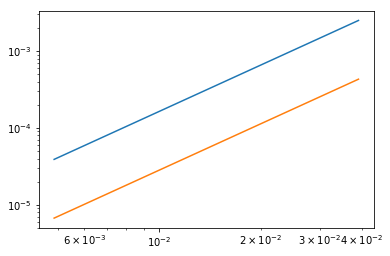

In [553]:
plt.plot(params['h'], params['dt'])
plt.plot(params['h'], params['eta_T'])
plt.loglog()

In [545]:
params['dt']

0    0.002500
1    0.000625
2    0.000156
3    0.000039
Name: dt, dtype: float64

In [92]:
data_b_tfix

{8: {}, 9: {}, 10: {}, 11: {}}